# Exercise 18

## Analyze class homeworks


In [24]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import textdistance

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('E18.xlsx')
data.head()

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


### Data Preparation

The missing values will be replace by an empty text `""` so this will not create false bais for the writing patterns.

In [3]:
df = data.drop('Sexo', axis=1)

df.fillna("", inplace=True)
df.head()

,T1,T2,T3,T4,T5,T6
0,Un científico de datos y un ingeniero de datos...,,Los árboles de decisión es uno de los algoritm...,,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,
4,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


# Exercise 18.1

Analyze the writing patterns of each student
_____

Will be obtain the following metrics:

* Not delivered text (aka *missing values*)
* Average of words used per text
* Average of characters used per text

In [4]:
msvl = []

for i in np.arange(df.shape[0]):
    msvl.append(float(data.loc[i].isna().sum()))

msvl = pd.DataFrame(msvl, columns=['Missing_values'])
msvl.head()

,Missing_values
0,2.0
1,1.0
2,0.0
3,1.0
4,0.0


In [5]:
aux_words = pd.DataFrame(index = range(0,df.shape[0]), columns=range(0,df.shape[1]), dtype='float')

for i in np.arange(df.shape[0]):
    count = 0
    for j in np.arange(df.shape[1]):
        aux_words.iloc[i][j] = len(df.iloc[i][j].split())
        
words = aux_words.sum(axis=1)
words = pd.DataFrame(words, columns=['Words'])
words.head()

,Words
0,1845.0
1,1320.0
2,1772.0
3,1467.0
4,1670.0


In [6]:
aux_characters = pd.DataFrame(index = range(0,df.shape[0]), columns=range(0,df.shape[1]), dtype='float')

for i in np.arange(df.shape[0]):
    count = 0
    for j in np.arange(df.shape[1]):
        aux_characters.iloc[i][j] = len(df.iloc[i][j])
        
characters = aux_characters.sum(axis=1)
characters = pd.DataFrame(characters, columns=['Characters'])
characters.head()

,Characters
0,11574.0
1,8513.0
2,11102.0
3,9586.0
4,10241.0


In [7]:
results = pd.DataFrame(index = range(0, df.shape[0]), columns = range(0,2))
results.rename(columns = {0 : 'average_Words',
                           1 : 'average_Characters'}, inplace=True)

for i in np.arange(results.shape[0]):
    results.iloc[i][0] = float (words.iloc[i][0] / (6 - msvl.iloc[i][0]))
    results.iloc[i][1] = float(characters.iloc[i][0] / (6 - msvl.iloc[i][0]))
    
results = pd.concat([results, msvl], axis=1, sort=False)
results = results.convert_objects(convert_numeric=True)

results.head()

,average_Words,average_Characters,Missing_values
0,461.250000,2893.500000,2.0
1,264.000000,1702.600000,1.0
2,295.333333,1850.333333,0.0
3,293.400000,1917.200000,1.0
4,278.333333,1706.833333,0.0


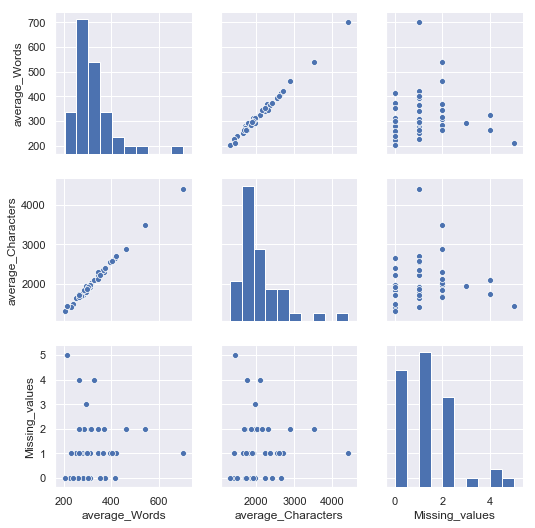

In [8]:
sns.set(style="darkgrid")

sns.pairplot(results)
plt.show()

# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

It requires to have a single text for the prediction

In [25]:
aux = df['T1'] + " " + df['T2'] + " " + df['T3'] + " " + df['T4'] + " " + df['T5'] + " " + df['T6']

Now, makes a test!

In [27]:
pd.DataFrame(aux).iloc[0][0]

'Un científico de datos y un ingeniero de datos tienen ciertas habilidades en común, por ejemplo, poseen habilidades de programación. Sin embargo, las habilidades de programación de un ingeniero de datos están mucho más allá de las habilidades de programación de un científico de datos. Hacer que un científico de datos cree un flujo de datos está en el extremo más alejado de sus habilidades, pero es el pan de cada día de un ingeniero de datos. En general, existen varias diferencias entre un científico e ingeniero de datos. Un científico de datos puede organizar y almacenar gran cantidad de datos. Además, puede realizar análisis descriptivos, predictivos y prescriptivos, con el fin de resolver una necesidad de negocio y generar valor a la compañía. Dentro de sus áreas de conocimiento están las matemáticas, la estadística, la física, la investigación de operaciones y las ciencias de la computación. Un científico de datos es responsable de optimizar el rendimiento de un modelo de aprendiza

In [28]:
pd.DataFrame(aux).iloc[1][0]

'Aunque los dos perfiles cuentan con habilidades que son comunes existen diferencias significativas entre el Data Scientist y el Data Engineer. El primero cuenta con una fuerte formación  en matemáticas y estadística para la construcción de modelos predictivos y prescriptivos mientras que el segundo se destaca por sus habilidades en programación, administración de grandes volúmenes de datos y sistemas distribuidos de información. Al hablar de responsabilidades el Data Engineer tiene que encargarse de desarrollar, construir y mantener arquitecturas para la adquisición preparación y distribución de los datos garantizando la confiabilidad, eficiencia y calidad de la información e ideando siempre nuevas y mejores formas para automatizar estas tareas utilizando la herramienta adecuada para cada actividad. En ese sentido el rol del Data Engineer es de servir de apoyo a todos los posibles clientes de esas fuentes de datos incluyendo a los Data Scientist. Por otro lado el Data Scientist se enc

Calculate the `textdistance` for this two examples!

In [30]:
textdistance.hamming(pd.DataFrame(aux).iloc[0][0], pd.DataFrame(aux).iloc[1][0])

10992

Create a matrix for these similarities!

In [34]:
sim = pd.DataFrame(index = range(0, pd.DataFrame(aux).shape[0]), columns = range(0,pd.DataFrame(aux).shape[0]))

for i in np.arange(sim.shape[0]):
    for j in np.arange(sim.shape[0]):
        sim.iloc[i][j] = textdistance.hamming(pd.DataFrame(aux).iloc[i][0], pd.DataFrame(aux).iloc[j][0])
    
sim

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,10992,10800,10924,10898,10987,11002,11953,11001,10968,...,11116,10928,10714,10932,12106,13642,11482,12482,10884,10984
1,10992,0,10488,9002,9626,7965,7974,12128,7945,11113,...,8011,11117,10948,8635,12337,13878,8402,12667,8711,7922
2,10800,10488,0,10392,10317,10540,10573,11917,10524,10998,...,10581,10992,10800,10455,12121,13658,11014,12491,10447,10487
3,10924,9002,10392,0,9546,9033,9024,12065,8960,11087,...,9114,11019,10873,8939,12232,13770,9483,12573,8938,8993
4,10898,9626,10317,9546,0,9659,9628,11951,9667,11044,...,9739,11010,10833,9608,12185,13718,10132,12590,9512,9634
5,10987,7965,10540,9033,9659,0,7548,12207,7883,11206,...,7418,11178,10991,8681,12357,13915,7805,12776,8815,8016
6,11002,7974,10573,9024,9628,7548,0,12138,7882,11204,...,7595,11205,10982,8647,12377,13894,8010,12795,8814,8033
7,11953,12128,11917,12065,11951,12207,12138,0,12166,11960,...,12275,11903,11926,12058,12054,13516,12663,12382,12096,12188
8,11001,7945,10524,8960,9667,7883,7882,12166,0,11176,...,7929,11148,10922,8665,12308,13837,8361,12764,8786,7963
9,10968,11113,10998,11087,11044,11206,11204,11960,11176,0,...,11241,10910,10937,11077,12031,13528,11674,12433,11053,11093


# Exercise 18.3

Create a classifier to predict the sex of each student

Are relevant the `stop_words` ? Keep on mind that the text are in Spanish and English.

* The 10 most common words in English ([source](https://en.wikipedia.org/wiki/Most_common_words_in_English))
* The 10 most common words in Spanish ([source](http://corpus.rae.es/frec/1000_formas.TXT))

In [10]:
list_stopwords_en = {'the','be','to','of','and','a','in','that','have','I'}
list_stopwords_es = {'de','la','que','el','en','y','los','se','del','las'}

list_stopwords = set.union(list_stopwords_en,list_stopwords_es)

Now, extract the features from the text

In [11]:
vect = CountVectorizer(stop_words=list_stopwords)

X_dtm = vect.fit_transform(aux).toarray()

pd.DataFrame(X_dtm).head()

,0,1,2,3,4,5,6,7,8,9,...,5857,5858,5859,5860,5861,5862,5863,5864,5865,5866
0,0,0,0,1,0,0,0,0,1,1,...,1,0,3,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Obtained the vocabulary of the texts analyzed

In [12]:
vect.vocabulary_

{'un': 5591,
 'científico': 910,
 'datos': 1522,
 'ingeniero': 3076,
 'tienen': 5469,
 'ciertas': 914,
 'habilidades': 2801,
 'común': 1143,
 'por': 4217,
 'ejemplo': 2000,
 'poseen': 4228,
 'programación': 4445,
 'sin': 5133,
 'embargo': 2033,
 'están': 2364,
 'mucho': 3665,
 'más': 3700,
 'allá': 306,
 'hacer': 2819,
 'cree': 1425,
 'flujo': 2602,
 'está': 2363,
 'extremo': 2528,
 'alejado': 280,
 'sus': 5335,
 'pero': 4116,
 'es': 2220,
 'pan': 3980,
 'cada': 763,
 'día': 1952,
 'general': 2713,
 'existen': 2443,
 'varias': 5706,
 'diferencias': 1801,
 'entre': 2173,
 'puede': 4532,
 'organizar': 3934,
 'almacenar': 310,
 'gran': 2769,
 'cantidad': 805,
 'además': 175,
 'realizar': 4653,
 'análisis': 389,
 'descriptivos': 1689,
 'predictivos': 4298,
 'prescriptivos': 4333,
 'con': 1145,
 'fin': 2580,
 'resolver': 4853,
 'una': 5592,
 'necesidad': 3737,
 'negocio': 3749,
 'generar': 2726,
 'valor': 5683,
 'compañía': 1067,
 'dentro': 1615,
 'áreas': 5841,
 'conocimiento': 1218,
 'mat

Standardize the features for the ML model for prediction

In [13]:
results['average_Words'] = preprocessing.scale(results['average_Words'])
results['average_Character'] = preprocessing.scale(results['average_Words'])
results['Missing_values'] = preprocessing.scale(results['average_Words'])

Create the features dataframe and target dataframe for the prediction.

In [14]:
X_ = pd.concat([pd.DataFrame(X_dtm), results], axis=1, sort=False)

X_.head()

,0,1,2,3,4,5,6,7,8,9,...,5861,5862,5863,5864,5865,5866,average_Words,average_Characters,Missing_values,average_Character
0,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1.547085,2893.500000,1.547085,1.547085
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,-0.659080,1702.600000,-0.659080,-0.659080
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,-0.308629,1850.333333,-0.308629,-0.308629
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,-0.330252,1917.200000,-0.330252,-0.330252
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.498767,1706.833333,-0.498767,-0.498767


In [15]:
y = data['Sexo']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=42)

In [17]:
clf = RandomForestClassifier(n_jobs=-1,
                             n_estimators=100,
                             max_depth=10, 
                             random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [18]:
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9090909090909091

This result is because the `RandomForestClassifier` creates everything as a `'H'` since the dataset is unbalanced for `'H'`